# Changes made to the Historical-transaction-data.csv
- Removed rows with less than 1 quantity_sold value:  8351
- No of item_description values generated:  1994
- No of invoice_ids generated:  4228

## Above changes are saved to a new csv file Historical-transaction-cleaned-data.csv

In [2]:
import pandas as pd
import seaborn as sns

historical_transactions = pd.read_csv("../data/Historical-transaction-cleaned-data.csv")
historical_transactions["invoice_id"] = historical_transactions["invoice_id"].astype(int)
historical_transactions["transaction_date"] = pd.to_datetime(historical_transactions["transaction_date"])
historical_transactions.sort_values(by='transaction_date', inplace=True)

In [3]:
historical_transactions.head()

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold
168929,GINGER BEER 1L,2021-10-15 00:00:00+00:00,2156337,YD1K,SHOP043,150,2
123031,CREAM SODA APPLE POP 1L,2021-10-15 00:00:00+00:00,2284533,UFWU,SHOP121,150,2
110010,GINGER BEER 500ML,2021-10-15 00:00:00+00:00,1985977,IA4W,SHOP038,100,1
212775,FIT O MIXED FRUIT 200ML,2021-10-15 00:00:00+00:00,1253209,SXQW,SHOP097,60,1
123030,ORANGE BARLEY 1.5L,2021-10-15 00:00:00+00:00,2284495,4KZY,SHOP121,220,1


In [4]:
historical_transactions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 465623 entries, 168929 to 424435
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype              
---  ------            --------------   -----              
 0   item_description  465623 non-null  object             
 1   transaction_date  465623 non-null  datetime64[ns, UTC]
 2   invoice_id        465623 non-null  int64              
 3   customer_id       465623 non-null  object             
 4   shop_id           465623 non-null  object             
 5   item_price        465623 non-null  int64              
 6   quantity_sold     465623 non-null  int64              
dtypes: datetime64[ns, UTC](1), int64(3), object(3)
memory usage: 28.4+ MB


In [5]:
historical_transactions.describe()

,invoice_id,item_price,quantity_sold
count,4.656230e+05,465623.000000,465623.000000
mean,2.080991e+06,207.493713,1.960066
std,1.520811e+06,167.877778,1.628437
min,1.700000e+01,35.000000,1.000000
25%,1.038512e+06,100.000000,1.000000
50%,2.046136e+06,200.000000,2.000000
75%,3.070249e+06,220.000000,2.000000
max,8.335982e+06,17400.000000,101.000000


In [6]:
print("\n* Historical-transaction-cleaned-data.csv SUMMARY *\n")
# Column names
print(f"{', '.join(historical_transactions.columns.tolist())} are the column names")
# No of rows
print(f"{len(historical_transactions)} total rows")

# Unique shop ids
shop_ids = historical_transactions["shop_id"].unique()
print(f"{len(shop_ids)} unique shop_id")

# Unique items
item_ids = historical_transactions["item_description"].unique()
print(f"{len(item_ids)} unique item_description")

# Unique transaction date
transaction_dates = historical_transactions["transaction_date"].unique()
print(f"{len(transaction_dates)} unique transaction_date")

# Unique item price
item_prices = historical_transactions["item_price"].unique()
print(f"{len(item_prices)} unique item_price")

# Unique quantity sold
quantities_sold = historical_transactions["quantity_sold"].unique()
print(f"{len(quantities_sold)} unique quantity_sold")


* Historical-transaction-cleaned-data.csv SUMMARY *

item_description, transaction_date, invoice_id, customer_id, shop_id, item_price, quantity_sold are the column names
465623 total rows
124 unique shop_id
2031 unique item_description
62 unique transaction_date
209 unique item_price
67 unique quantity_sold


/var/folders/d0/m5gt_pdn4n9fxzyw8jv02vcc0000gn/T/ipykernel_1261/1359164938.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  historical_transactions['transaction_month'] = historical_transactions['transaction_date'].dt.to_period('M')


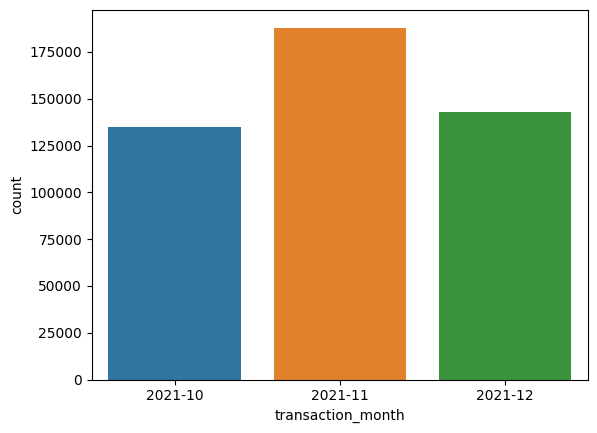

In [7]:
historical_transactions['transaction_month'] = historical_transactions['transaction_date'].dt.to_period('M')
ax = sns.countplot(x="transaction_month", data=historical_transactions)

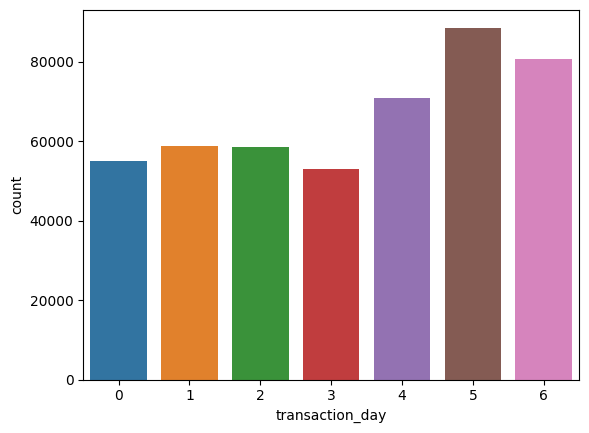

In [8]:
historical_transactions['transaction_day'] = historical_transactions['transaction_date'].dt.weekday
ax = sns.countplot(x="transaction_day", data=historical_transactions)

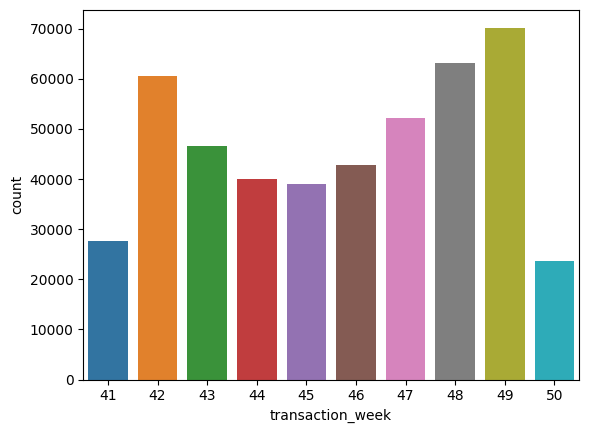

In [9]:
historical_transactions['transaction_week'] = historical_transactions['transaction_date'].dt.isocalendar().week
ax = sns.countplot(x="transaction_week", data=historical_transactions)

It's interesting to note that the transactions only occurred in October, November, and December of 2021. The fact that transactions are evenly distributed across all weeks and weekdays indicates that there might not be any specific seasonality or day-of-week trends in the dataset.

However, it's still important to consider these factors when generating features for your predictive model, as other patterns might emerge when combining transaction_date with other columns, such as shop_id or item_description. Additionally, keep in mind that the limited timeframe of the dataset might limit your ability to identify long-term trends or seasonality.

# List of features to generate from the Historical-transaction-cleaned-data.csv:

1. Total sales per shop: Calculate the sum of sales of all transactions for each shop.
2. Total quantity sold per shop: Calculate the total quantity of items sold per shop.
3. Total bills per shop: Calculate the sum of invoices for each shop.
4. Total transactions per shop: Calculate the total number of transactions per shop.
5. Total unique items sold per shop: Calculate the number of unique item_descriptions per shop.
6. Total unique customers per shop: Calculate the number of unique customer_ids per shop.
7. Total weeks per shop: Calculate sum of weeks containing atleast one transaction for each shop.
8. Total days per shop: Calculate sum of days containing atleast one transaction for each shop.

These features should provide a comprehensive view of the transaction data and help improve the performance of your predictive model. Remember to merge these features with the Store-info.csv dataset based on the shop_id before training your model.